In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons, load_iris

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
X , y = make_moons( n_samples= 1000 , noise= 0.2, random_state= 666 )

# DecisionTreeClassifier

In [5]:
dtree = DecisionTreeClassifier()

In [6]:
dtree.fit(X , y)

DecisionTreeClassifier()

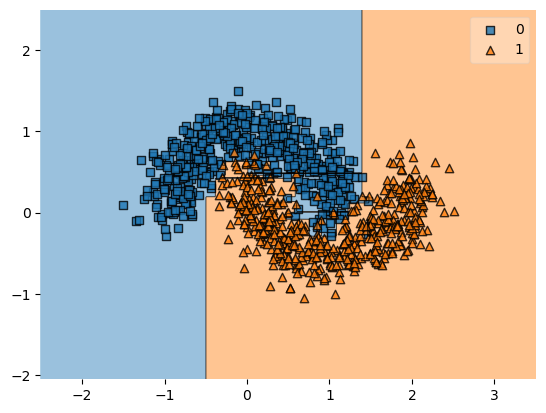

In [7]:
plot_decision_regions(X,y,dtree)
plt.show()

# GaussianNB Theorem

In [8]:
nb_classifier = GaussianNB()

In [9]:
nb_classifier.fit(X,y)

GaussianNB()

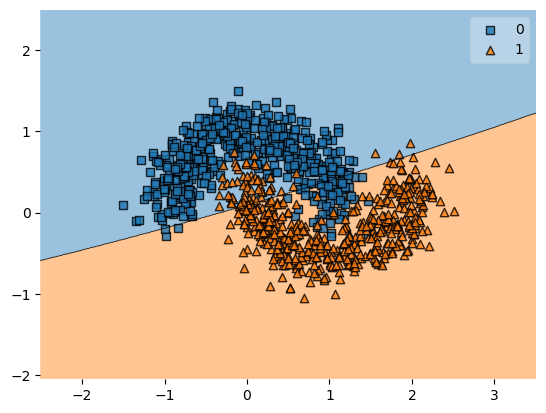

In [10]:
plot_decision_regions(X,y,nb_classifier)
plt.show()

# Iris Dataset

In [11]:
iris_data = load_iris()

In [12]:
X = iris_data.data
y =  iris_data.target

In [13]:
class_names = iris_data.feature_names
class_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.2)

# DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dtree.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

0.8666666666666667

# Naive_bayes

In [19]:
nb = GaussianNB()

In [20]:
nb.fit(X_train,y_train)

GaussianNB()

In [21]:
y_pred = nb.predict(X_test)

In [22]:
accuracy_score(y_test , y_pred)

0.9666666666666667

# Ensemble Learning

**Decision from multiple Models**

In [23]:
dtree = DecisionTreeClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()

In [24]:
from sklearn.ensemble import VotingClassifier

In [25]:
ensemble_clf = VotingClassifier(estimators=[('KNN',knn),
                                           ('DTree',dtree),
                                           ('NaiveBayes',nb)],
                               n_jobs= -1,
                               voting='soft'
                               )

In [26]:
ensemble_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                             ('DTree', DecisionTreeClassifier()),
                             ('NaiveBayes', GaussianNB())],
                 n_jobs=-1, voting='soft')

In [27]:
y_pred = ensemble_clf.predict(X_test)
y_pred

array([2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 1, 2, 1, 2, 2, 0, 1])

In [28]:
accuracy_score(y_test , y_pred)

0.9333333333333333

In [29]:
ensemble_clf.predict_proba(X_test)

array([[1.64999559e-267, 5.67123739e-011, 1.00000000e+000],
       [1.00000000e+000, 9.95125134e-019, 3.70877319e-027],
       [1.72896527e-112, 9.49072122e-001, 5.09278783e-002],
       [2.33876537e-100, 9.97875520e-001, 2.12447962e-003],
       [2.44196165e-094, 9.97243495e-001, 2.75650544e-003],
       [4.22863595e-072, 9.99989258e-001, 1.07418328e-005],
       [1.00000000e+000, 1.48666683e-018, 4.30743186e-027],
       [3.83829525e-136, 6.22405618e-001, 3.77594382e-001],
       [3.33603362e-137, 5.58901671e-001, 4.41098329e-001],
       [1.00000000e+000, 1.20100475e-021, 1.48333008e-028],
       [1.14323017e-093, 9.99698334e-001, 3.01665607e-004],
       [1.00000000e+000, 1.12397421e-017, 4.18070849e-026],
       [7.72926364e-079, 9.99965311e-001, 3.46885142e-005],
       [4.66995957e-170, 1.46580254e-003, 9.98534197e-001],
       [5.71196071e-091, 9.99164431e-001, 8.35569456e-004],
       [7.38313761e-064, 9.99994882e-001, 5.11771978e-006],
       [1.11012648e-035, 6.66666607e-001

# RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rand_forest = RandomForestClassifier(n_jobs= -1)

In [33]:
rand_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [34]:
rand_forest.predict(X_test)

array([2, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 2, 2, 0, 1])

In [35]:
rand_forest.feature_importances_

array([0.13272587, 0.03553231, 0.41283064, 0.41891118])

In [36]:
class_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']